# Predicting the Batting Average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ODI Batting Average

In [2]:
df = pd.read_csv('Data/Final/odi_bat_processed_data.csv')
df.head()

,Batting Style,Playing Role,Innings_T20_batting,Innings_Test_batting,NO_T20,NO_Test,Runs_T20_batting,Runs_Test_batting,HS_T20,HS_Test,...,50_Test,0_T20,0_Test,T20_Matches,Test_Matches,Country,SpanStart_Test,SpanStart_T20,AgeStart_Test,AgeStart_T20
0,0,1,1,13,1,0,6,310,6,82,...,1,0,1,1,7,5,2023,2024,24.643836,25.643836
1,1,1,106,18,4,1,2392,401,83,95,...,4,6,3,110,9,4,2018,2015,27.586301,24.586301
2,0,0,16,10,8,2,65,135,11,43,...,0,2,3,33,6,1,2018,2012,24.819178,18.819178
3,1,0,11,41,4,5,337,1462,85,162,...,10,2,4,14,26,3,2004,2005,29.080000,30.080000
4,1,1,2,28,0,0,23,657,15,104,...,4,0,2,2,15,5,2009,2010,19.290411,20.290411


In [3]:
X = df.drop('Ave_ODI_batting', axis = 1)

In [4]:
y = df['Ave_ODI_batting']

##### Dropping with correlation

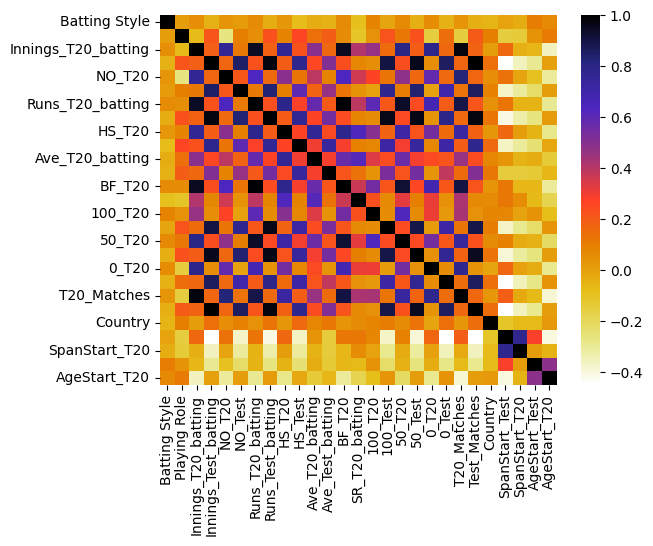

In [5]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [6]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [7]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [8]:
highly_correlated

['NO_Test',
 'Runs_T20_batting',
 'Runs_Test_batting',
 'BF_T20',
 '100_Test',
 '50_T20',
 '50_Test',
 '0_Test',
 'T20_Matches',
 'Test_Matches']

In [9]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

/Users/henil08/College/Projects/Cricket-all-format/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

In [17]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=16, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 944.6920 - mae: 28.5996 - val_loss: 919.8438 - val_mae: 28.5719 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 859.4728 - mae: 26.6407 - val_loss: 867.1715 - val_mae: 27.6813 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 869.1309 - mae: 26.9447 - val_loss: 802.7978 - val_mae: 26.5379 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 722.8533 - mae: 24.3524 - val_loss: 722.2574 - val_mae: 25.0103 - learning_rate: 0.0010
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 655.4161 - mae: 23.1139 - val_loss: 621.5773 - val_mae: 22.9251 - learning_rate: 0.0010
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 534.6244 - mae: 20.5839 - val_loss: 504.8352 - val_mae: 20.2881 - learning_rate: 0.0010
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 470.9657 - mae: 18.8038 - val_loss: 382.2245 - val_mae: 17.

In [18]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.9970 - mae: 6.9666 
Test MAE: 6.788480758666992


In [19]:
# Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test MSE: 75.1126485545205
Test R2 Score: 0.29033712197542527


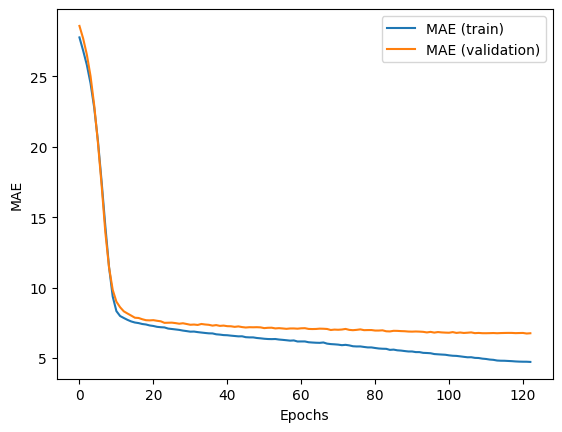

In [20]:
plt.plot(history.history['mae'], label='MAE (train)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Test Batting Average

In [21]:
df = pd.read_csv('Data/Final/test_bat_processed_data.csv')
df.head()

,Batting Style,Playing Role,Innings_ODI_batting,Innings_T20_batting,NO_ODI,NO_T20,Runs_ODI_batting,Runs_T20_batting,HS_ODI,HS_T20,...,50_T20,0_ODI,0_T20,ODI_Matches,T20_Matches,Country,SpanStart_ODI,SpanStart_T20,AgeStart_ODI,AgeStart_T20
0,1,0,10,1,0,1,288,6,66,6,...,0,0,0,10,1,4,2023,2024,24.643836,25.643836
1,0,0,102,106,8,4,3008,2392,145,83,...,12,7,6,108,110,5,2010,2015,19.586301,24.586301
2,1,1,30,16,6,8,291,65,50,11,...,0,3,2,40,33,11,2012,2012,18.819178,18.819178
3,0,1,161,11,33,4,5088,337,156,85,...,2,15,2,198,14,9,1998,2005,23.080000,30.080000
4,0,0,14,2,1,0,394,23,113,15,...,0,2,0,14,2,4,2010,2010,20.290411,20.290411


In [22]:
X = df.drop('Ave_Test_batting', axis = 1)

In [23]:
y = df['Ave_Test_batting']

##### Dropping with correlation

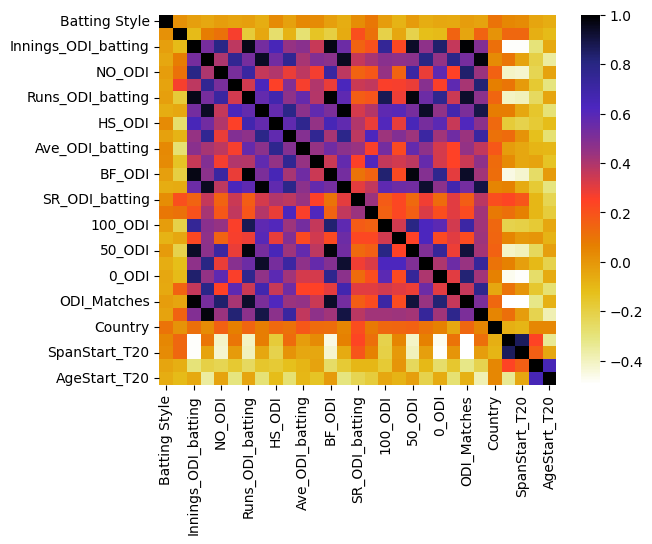

In [24]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [25]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [26]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [27]:
highly_correlated

['Runs_ODI_batting',
 'Runs_T20_batting',
 'BF_ODI',
 'BF_T20',
 '100_ODI',
 '50_ODI',
 '50_T20',
 '0_ODI',
 'ODI_Matches',
 'T20_Matches',
 'SpanStart_T20']

In [28]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

/Users/henil08/College/Projects/Cricket-all-format/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [33]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

In [34]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=16, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 893.3801 - mae: 27.0808 - val_loss: 898.9056 - val_mae: 27.2800 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 894.7620 - mae: 26.4908 - val_loss: 806.5989 - val_mae: 25.6609 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 795.2912 - mae: 24.7803 - val_loss: 688.5441 - val_mae: 23.5275 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 601.5195 - mae: 21.7732 - val_loss: 543.9294 - val_mae: 20.6428 - learning_rate: 0.0010
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 567.3525 - mae: 20.0721 - val_loss: 393.0264 - val_mae: 17.2230 - learning_rate: 0.0010
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 383.9821 - mae: 15.4110 - val_loss: 279.0078 - val_mae: 14.0381 - learning_rate: 0.0010
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240.3652 - mae: 12.8051 - val_loss: 209.7968 - val_mae: 11.

In [35]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140.8701 - mae: 8.8376
Test MAE: 8.959860801696777


In [36]:
# Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test MSE: 138.3126035483981
Test R2 Score: 0.129266023588545


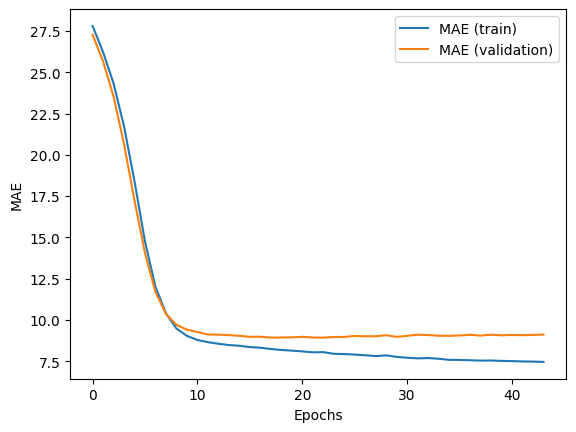

In [37]:
plt.plot(history.history['mae'], label='MAE (train)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## T20 Batting Average

In [38]:
df = pd.read_csv('Data/Final/t20_bat_processed_data.csv')
df.head()

,Batting Style,Playing Role,Innings_ODI_batting,Innings_Test_batting,NO_ODI,NO_Test,Runs_ODI_batting,Runs_Test_batting,HS_ODI,HS_Test,...,50_Test,0_ODI,0_Test,ODI_Matches,Test_Matches,Country,SpanStart_ODI,SpanStart_Test,AgeStart_ODI,AgeStart_Test
0,0,1,10,13,0,0,288,310,66,82,...,1,0,1,10,7,11,2023,2023,24.643836,24.643836
1,1,1,102,18,8,1,3008,401,145,95,...,4,7,3,108,9,1,2010,2018,19.586301,27.586301
2,0,0,30,10,6,2,291,135,50,43,...,0,3,3,40,6,2,2012,2018,18.819178,24.819178
3,1,0,161,41,33,5,5088,1462,156,162,...,10,15,4,198,26,7,1998,2004,23.080000,29.080000
4,1,1,14,28,1,0,394,657,113,104,...,4,2,2,14,15,11,2010,2009,20.290411,19.290411


In [39]:
X = df.drop('Ave_T20_batting', axis = 1)

In [40]:
y = df['Ave_T20_batting']

##### Dropping with correlation

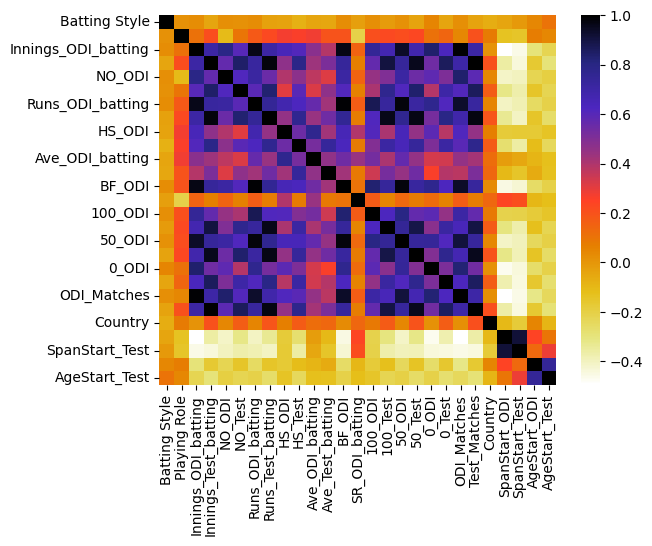

In [41]:
cor = X.corr()
sns.heatmap(cor, annot = False, cmap = plt.cm.CMRmap_r)
plt.show()

In [42]:
# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

In [43]:
# Find features with correlation greater than 0.8
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.8)]

In [44]:
highly_correlated

['NO_Test',
 'Runs_ODI_batting',
 'Runs_Test_batting',
 'BF_ODI',
 '100_ODI',
 '100_Test',
 '50_ODI',
 '50_Test',
 '0_ODI',
 '0_Test',
 'ODI_Matches',
 'Test_Matches',
 'SpanStart_Test']

In [45]:
# Drop highly correlated features
X = X.drop(columns=highly_correlated)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

/Users/henil08/College/Projects/Cricket-all-format/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [50]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

In [51]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=16, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 441.2665 - mae: 18.0286 - val_loss: 447.1108 - val_mae: 19.1245 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 410.8913 - mae: 18.0022 - val_loss: 379.8927 - val_mae: 17.4875 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 320.8312 - mae: 15.5907 - val_loss: 292.2417 - val_mae: 15.2021 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227.6859 - mae: 12.7291 - val_loss: 195.9267 - val_mae: 12.1417 - learning_rate: 0.0010
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155.2889 - mae: 9.9972 - val_loss: 129.3102 - val_mae: 9.1107 - learning_rate: 0.0010
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.7671 - mae: 8.1033 - val_loss: 103.4476 - val_mae: 7.4012 - learning_rate: 0.0010
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103.7848 - mae: 7.3756 - val_loss: 99.0648 - val_mae: 7.0570 - 

In [52]:
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.3725 - mae: 6.5655
Test MAE: 6.6188554763793945


In [53]:
# Predictions
y_pred = model.predict(X_test)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30c6d34c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test MSE: 72.91401161003891
Test R2 Score: 0.16233189893520783


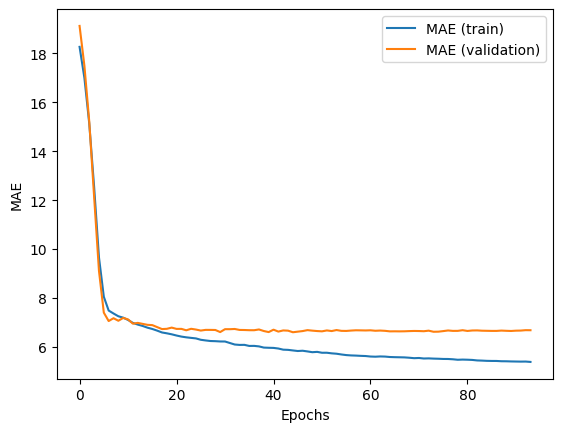

In [54]:
plt.plot(history.history['mae'], label='MAE (train)')
plt.plot(history.history['val_mae'], label='MAE (validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Final MSE and R2

| Match Type | MSE                     | R²                   |
|------------|------------------------|------------------------|
| ODI        |   75.112 |   0.2903|
| Test       |   138.312|    0.1292|
| T20        |   72.914 |   0.1623|